In [3]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# LOAD Data SET and EDA

In [4]:
df = pd.read_csv('grad.csv')
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


# fix rank and crosstab

In [5]:
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
pd.crosstab([df.admit], [df['rank']],
            dropna=False)

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


# Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C76DA0>,
      dtype=object)

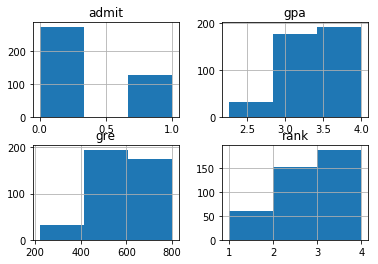

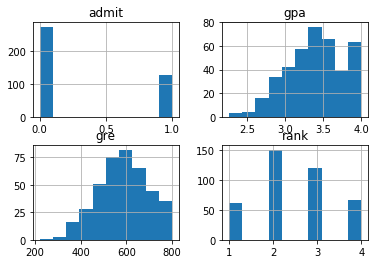

In [6]:
hist = df.hist(bins=3)
df.hist()

In [7]:
y = df.pop('admit')

In [9]:
df.head()

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [11]:
df.columns = ['prestige' if x=='rank' else x for x in df.columns]
df.head()

,gre,gpa,prestige
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


# get dummies

In [12]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [13]:
cols_to_keep = ['gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
data.head()

,gre,gpa,prestige_2,prestige_3,prestige_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1


In [14]:
y

0      0
1      1
2      1
3      1
4      0
5      1
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     0
16     0
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     1
25     1
26     1
27     1
28     1
29     0
      ..
370    1
371    1
372    1
373    1
374    0
375    0
376    0
377    1
378    0
379    0
380    0
381    1
382    0
383    0
384    1
385    0
386    1
387    0
388    0
389    0
390    1
391    1
392    1
393    1
394    1
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [15]:
X = data

In [16]:
X.head()

,gre,gpa,prestige_2,prestige_3,prestige_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1


# Create Logistic Regression

In [19]:
model = LogisticRegression()

# Create Hyperparameter Search Space

In [20]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create Grid Search

In [23]:
# Create grid search using 10-fold cross validation
clf = GridSearchCV(model, hyperparameters, cv=10, verbose=0)

In [24]:
# Fit grid search
best_model = clf.fit(X, y)

c:\users\edb56ff\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\edb56ff\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\edb56ff\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\edb56ff\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\edb56ff\appdata\local\programs\python\pytho

In [25]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [26]:
best_model.predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Split Train and Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Plot ROC

log loss 0.5747783242468475
auc is  0.6893224885350869


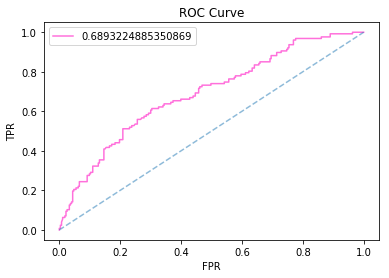

In [28]:
y_hat = best_model.predict(X)
p_hat = best_model.predict_proba(X)[:,1]
print("log loss", log_loss(y, p_hat))
pred_neg = (y == y_hat)[p_hat < 0.5]
pred_pos = (y == y_hat)[p_hat > 0.5]
pred_neg, pred_pos
cm = confusion_matrix(y, y_hat)
accuracy_score(y, y_hat)
precision_score(y, y_hat)
recall_score(y, y_hat)
auc = roc_auc_score(y, p_hat)
print("auc is ", auc)
fpr, tpr, thr = roc_curve(y, p_hat)
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()